In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


In [2]:
def create_star_field_polar(stars, r, vr, vtheta):
    """
    Creates a 'field' of stars (where 'stars' is the desired number of stars) in a ring r distance from the origin
    and returns them in a list. vr and vtheta are the desired initial components of the velocity of every star.
    Each star is defined by a list of four numbers: its initial position components (r and theta), 
    and its initial velocity components (vr and vtheta). Stars are defined using a polar coordinate system.
    """
    import numpy as np
    star_field = []                                       #creates an empty list
    theta = np.arange(0, 2 * np.pi, (2 * np.pi) / stars)  #creates an array of theta coordinates in a ring around the origin
    for i in theta:                                       #for each theta a star is creates at r
        star_field.append([r, i, vr, vtheta])     
    return star_field                                     #each star is added to the list, which is returned at the very end

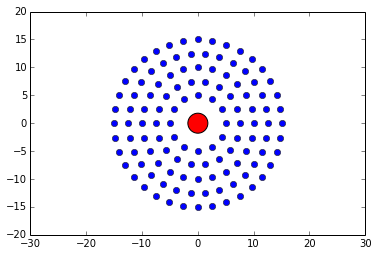

In [6]:
Rmin = 25 #kpc
T = 5.442 #time-units (544.2 million years)
ring1 = create_star_field_polar(12, (.2 * Rmin), 0, 2 * np.pi / T)      #create five rings of stars around the galaxy's center
ring2 = create_star_field_polar(18, (.3 * Rmin), 0, 2 * np.pi / T)
ring3 = create_star_field_polar(24, (.4 * Rmin), 0, 2 * np.pi / T)
ring4 = create_star_field_polar(30, (.5 * Rmin), 0, 2 * np.pi / T)
ring5 = create_star_field_polar(36, (.6 * Rmin), 0, 2 * np.pi / T)

rings = [ring1, ring2, ring3, ring4, ring5]         #save those rings in a list
for ring in rings:                                  #plot the positions of each star in each ring
    x = []
    y = []
    for star in ring:
        x.append(star[0] * np.cos(star[1]))
        y.append(star[0] * np.sin(star[1]))
    plt.axis("equal")
    plt.plot(x, y, 'bo')
plt.scatter(0, 0, s = 400, c = 'r')                 #plots the center of galaxy, for reference
plt.show()

In [4]:
def create_star_field_cartesian(stars, r, vx, vy):
    """
    Creates a 'field' of stars (where 'stars' is the desired number of stars) in a ring r distance from the origin
    and returns them in a list. vx and vy are the desired initial components of the velocity of every star.
    Each star is defined by a list of four numbers: its initial position components (x and y), and its initial
    velocity components (vx and vy). Stars are defined using a cartesian coordinate system.
    """
    import numpy as np
    star_field = []                                         #creates an empty list
    theta = np.arange(0, 2 * np.pi, (2 * np.pi) / stars)    #creates an array of theta coordinates in a ring around the origin
    for i in theta:                                         #for each theta a star is creates at r
        x = r * np.cos(i)                                   #star's position is converted to a cartesian coordinate
        y = r * np.sin(i)
        star_field.append([x, y, vx, vy])
    return star_field                                       #each star is added to the list, which is returned at the very end

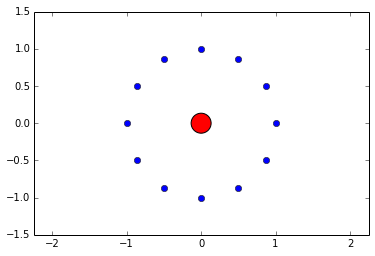

In [5]:
ring1c = create_star_field_cartesian(12, 1, 0, 0)           #creates and plots a test field
for star in ring1c:
    plt.axis("equal")
    plt.plot(star[0], star[1], 'bo')
plt.scatter(0, 0, s = 400, c = 'r')                         #plots the center of the galaxy, for reference
plt.show()

In [19]:
def create_galaxy(rings, stars, star_increase, r, seperation, cord_sys, v_init):
    """
    Creates a galaxy with 'rings' amount of rings, starting r distance from the galactic center and then propagating
    outward with distance 'seperation' between each one. Uses whichever cordinate system is specified, and gives all
    stars in the galaxy an initial velocity of v_init (a list which contains both vectors of that velocity).
    """
    galaxy = []
    if cord_sys == 'cartesian' or 'Cartesian' or 'car' or 'c':
        for i in range(rings):
            vx = v_init[0]; vy = v_init[1]
            galaxy.append(create_star_field_cartesian(stars, r, vx, vy))
            r = r + seperation
            stars = stars + star_increase
        return galaxy
    elif cord_sys == 'polar' or 'Polar' or 'pol' or 'p':
        for i in range(rings):
            vr = v_init[0]; vtheta = v_init[1]
            galaxy.append(create_star_field_polar(stars, r, vr, vtheta))
            r = r + seperation
            stars = stars + star_increase
        return galaxy
    else:
        print 'Invalid Coordinate system'
        return none
    
#I've just realized that there is a problem here, specifically with the cartesian system. All stars created by this function
#will have the same velocity vector. This is not a problem for the polar coordinate system, because in uniform circular motion
#all stars will have the same radial velocity (zero) and the same angular velocity. That's how a circle works.
#This is not true for a cartesian system. In cartesian coordinates each star's velocity vector is going to be changing
#instantaniously as it circles around--a constant velocity vector would be a straight line. This paragraph is somewhat of an 
#obvious statement, but not understanding the differances between coordiante systems was part of what cause my problems in my 
#first attempt.
#in summary, the first part of this function is useless for what we want to achieve--though it does work as stated.

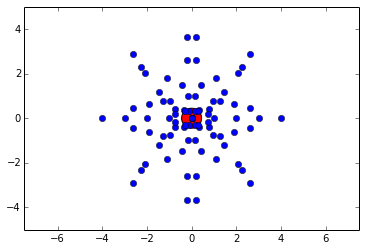

In [21]:
galaxy = create_galaxy(4, 12, 6, 1, 1, 'pol', [0, pi/3])
for ring in galaxy:
    x = []
    y = []
    for star in ring:
        x.append(star[0] * np.cos(star[1]))
        y.append(star[0] * np.sin(star[1]))
    plt.axis("equal")
    plt.plot(x, y, 'bo')
plt.scatter(0, 0, s = 400, c = 'r')                 #plots the center of galaxy, for reference
plt.show()

In [7]:
def three_body(current_locals, t):
    """
    Return the derivatives of the given equation for the position vectors of a star and a disrupting galaxy.
    """
    import numpy as np
    new = np.zeros(8)                                   #initializes an empty array that will hold derivatives
                            
    M = current_locals[8]                               #mass of central galaxy
    S = current_locals[9]                               #mass of disrupting galaxy
    G = current_locals[10]                              #gravitational constant     
    
    x = current_locals[0]                               #extracts position information for the star
    y = current_locals[1]                              
    r = np.sqrt((x ** 2) + (y ** 2))
    
    w = current_locals[4]                               #extracts position information for the disrupting galaxy
    z = current_locals[5]
    R = np.sqrt((w ** 2) + (z ** 2))
    
    rhox = w - x
    rhoy = z - y
    rho = R - r                                         #calculates distance information between star and disrupting galaxy

    new[0] = current_locals[2]                          #sets new location information equal to current info's derivatives
    new[1] = current_locals[3]
    new[2] = -G * (((M / (r ** 3.)) * x) - ((S / (rho ** 3.)) * rhox) + ((S / (R ** 3.)) * w))
    new[3] = -G * (((M / (r ** 3.)) * y) - ((S / (rho ** 3.)) * rhoy) + ((S / (R ** 3.)) * z))
    new[4] = current_locals[6]
    new[5] = current_locals[7]
    new[6] = -G * (((M + S) / (R ** 3.)) * w)
    new[7] = -G * (((M + S) / (R ** 3.)) * z)
    
    return new

In [9]:
ring1 = create_star_field_polar(12, (.2 * Rmin), 0, 2 * np.pi / T)
star = ring1[0]
print star

[5.0, 0.0, 0, 1.1545728238110229]


[  0.  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[ 1.15457282         nan         nan         nan         nan         nan
         nan         nan         nan         nan]


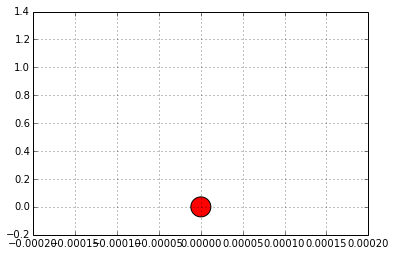

In [11]:
#location_data = [x, y, vx, vy, w, z, vw, vz, M, S, G]
G = 4.5 * (10 ** -8) #kpc^3 solar masses^-1 years^-2 
loc = [5.0, 0.0, 0.0, 1.1545728238110229, 0, 0, 0, 0, 10 ** 11, 0, G]
t = np.arange(0, 10, 1)

loc = odeint(three_body, loc, t);
    
x = loc[:,1]; # extracts the x values from loc
y = loc[:,3]; # extracts the y values from loc
print x
print y
plt.plot(x, y); #plot trajectory
plt.scatter(0, 0, s=400, c = 'r') #center of galaxy
plt.grid();
plt.show();